In [153]:
import numpy as np  
import matplotlib.pyplot as plt 
import math
from scipy.stats import poisson

In [154]:
#setting up the mdp

max_cars = 20
discount = 0.9
move_cost = 2
rent = 10
max_move = 5
cap = 10
l1_rent = 3
l1_ret = 3
l2_rent = 4
l2_ret = 2
delta = 1e-4

states = [(i,j) for i in range (max_cars+1) for j in range(max_cars+1)]
actions = np.arange(-5,6)
policy = np.zeros((max_cars + 1, max_cars + 1), dtype=int) # no. of cars moved has to be int
v = np.zeros((max_cars + 1, max_cars + 1))

In [155]:
# poisson stuff

memo=dict()
def prob(n,h):
    if (n,h) in memo:
        return memo[(n,h)]
    else:
        ans=poisson.pmf(n,h)
        memo[(n,h)]=ans
        return ans


# memo cuz faster and prof. prabhakaran W 


In [156]:
#reward function

def expected_reward(state,action,value):
    x,y=state
    reward  = -abs(action)*move_cost
    x = min(max_cars,max(0,x - action))
    y = min(max_cars,max(0,y + action))

    for i in range (0,cap+1):
        for j in range(0,cap+1):

            rent1=min(i,x)
            rent2=min(j,y)
            p_rent1=prob(i,l1_rent) 
            p_rent2=prob(j,l2_rent)
            reward+=(rent1+rent2)*rent*p_rent1*p_rent2 
            a=x-rent1
            b=y-rent2

            for u in range(cap+1):
                for v in range(cap+1):
                    
                    p_return1=prob(u,l1_ret)
                    p_return2=prob(v,l2_ret)
                    total_prob=p_rent1*p_rent2*p_return1*p_return2
                    new_x = min(max_cars, a + u)
                    new_y = min(max_cars, b + v)
                    reward+=discount*total_prob*value[new_x,new_y]
                    
    return reward

In [157]:
def policy_eval(policy,v):
    while True :
        change = 0
        for state in states:
                action=policy[state]
                old_val = v[state]
                v[state]=expected_reward(state,action,v)
                change=max(change,abs(old_val - v[state]))
        if change < delta :
            break

In [158]:
def policy_improvement(itr,policy,v) :
    print(itr)
    stable = True
    for state in states:
            x,y=state
            old_action = policy[state]
            action_return = []
            for action in range(-max_move,max_move+1):
                nx=x-action
                ny=y+action
                if 0 <= nx <= max_cars and 0 <= ny <= max_cars:
                    action_return.append(expected_reward((x,y),action,v))
                else :
                    action_return.append(-np.inf)
            best_action = np.argmax(action_return)-max_move
            policy[x,y]=best_action
            if old_action!=best_action :
                stable = False
    return stable

In [159]:

iteration = 0
while True :
    global policy
    policy_eval(policy,v)
    iteration+=1
    if policy_improvement(iteration,policy,v):
        break

1
2
3
4
5


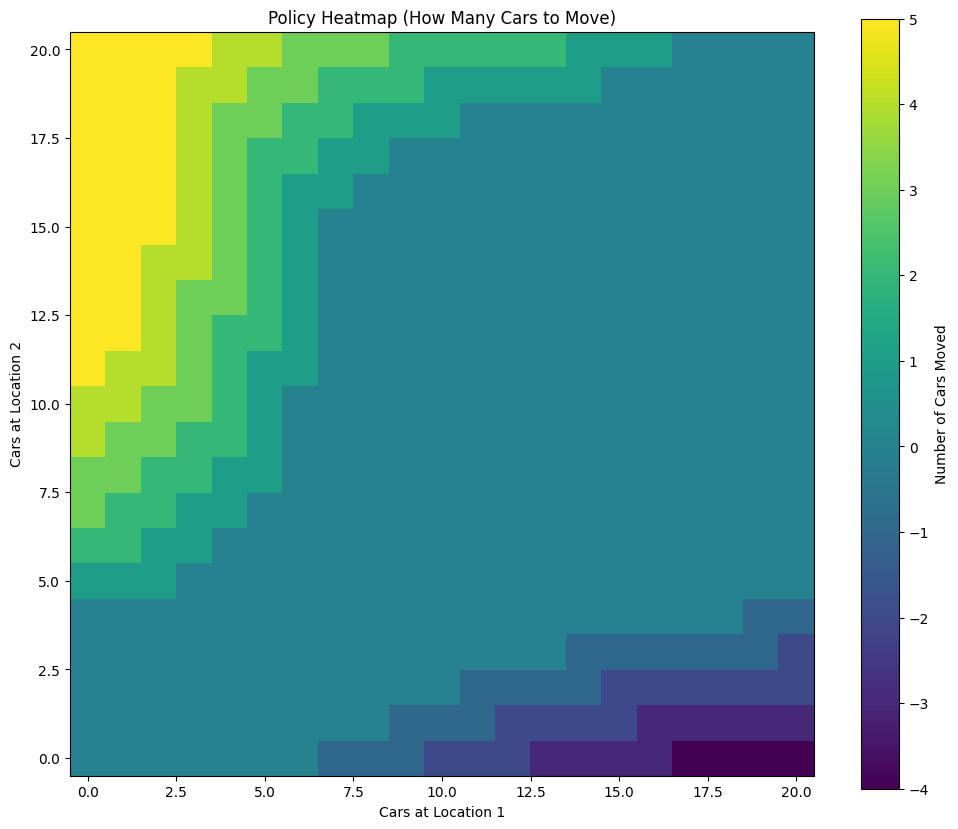

In [160]:

plt.figure(figsize=(12,10))
plt.imshow(policy, cmap='viridis', origin='lower')
plt.colorbar(label="Number of Cars Moved")
plt.xlabel("Cars at Location 1")
plt.ylabel("Cars at Location 2")
plt.title("Policy Heatmap (How Many Cars to Move)")
plt.show()